<img src="https://i.pinimg.com/originals/ee/2e/24/ee2e246795a13abc1fe01b28776626ef.jpg" alt= "LOGO CAT" width=400 height=400 align = "right">

<br>
<h1><font color="#7F000E" size=5>TOULOUSE LAUTREC </font></h1>
<h1><font color="#7F000R" size=6> APRENDIZAJE AUTOMATICO CON PYTHON </font></h1>
<h1><font color="#7F000E" size=4> BALANCEO DE DATOS </font></h1>
<br>
<br>
<div style="text-align:right">
<font color="#7F000E" size=3> Ing. Alexander Valdez</font><br>
<font color="#7F000E" size=3> Curso 2290, Clases Lunes y Miercoles 20:00-22:30pm </font><br>
<font color="#7F000e" size=3> Tercera Clase </font><br>
</div>

## **Manejo de clases Desbalanceadas con la librería Python ImbLearn**

REQUISITIO previo  instalar con:<p> pip install -U imbalanced-learn

In [37]:
pip install -U imbalanced-learn

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# LIBRERIAS SKLEAN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from pylab import rcParams
# LIBRERIAS imblearn
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

from collections import Counter

#set up graphic style in this case I am using the color scheme from xkcd.com
rcParams['figure.figsize'] = 14, 8.7 # Golden Mean
LABELS = ["Normal","Fraud"]
#col_list = ["cerulean","scarlet"]# https://xkcd.com/color/rgb/
#sns.set(style='white', font_scale=1.75, palette=sns.xkcd_palette(col_list))

%matplotlib inline

## Dataset Credit Card Fraud Detection

Descarga de Kaggle en https://www.kaggle.com/mlg-ulb/creditcardfraud/data

Se requiere una cuenta para descarga el data pero si no se cuenta con una lo descargamos del siguiente link.

Datos Credit Card Fraut Detection de la web de Kaggle. Son 66 MB que al descomprimir ocuparán 150MB. Usaremos el archivo creditcard.csv. Este dataset consta de 285.000 filas con 31 columnas (features). Como la información es privada, no sabemos realmente que significan los features y están nombradas como V1, V2, V3, etc. excepto por las columnas Time y Amount (el importe de la transacción). Y nuestras clases son 0 y 1 correspondiendo con “transacción Normal” ó “Hubo Fraude”. Como podrán imaginar, el set de datos está muy desequilibrado y tendremos muy pocas muestras etiquetadas como fraude.

---

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
df = pd.read_csv("/content/drive/MyDrive/DATASET_TOULOUSE_C3/creditcard.csv") # read in data downloaded to the local directory
df.head(n=5) #just to check you imported the dataset properly4

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape #secondary check on the size of the dataframe

(284807, 31)

In [44]:
pd.value_counts(df['Class'], sort = True) #class comparison 0=Normal 1=Fraud

0    284315
1       492
Name: Class, dtype: int64

Vemos que son 284.807 filas y solamente 492 son la clase minoritaria con los casos de fraude. Representan el 0,17% de las muestras

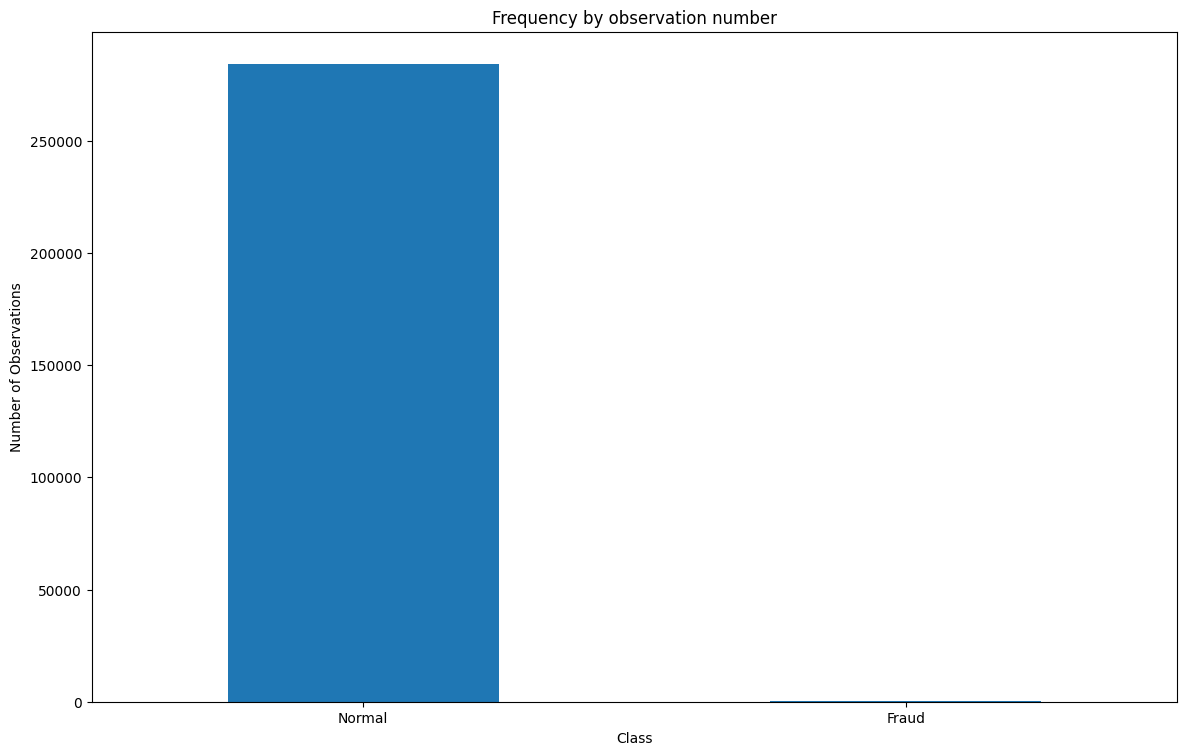

In [7]:
#if you don't have an intuitive sense of how imbalanced these two classes are, let's go visual
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

In [8]:
normal_df = df[df.Class == 0] #save normal_df observations into a separate df
fraud_df = df[df.Class == 1] #do the same for frauds

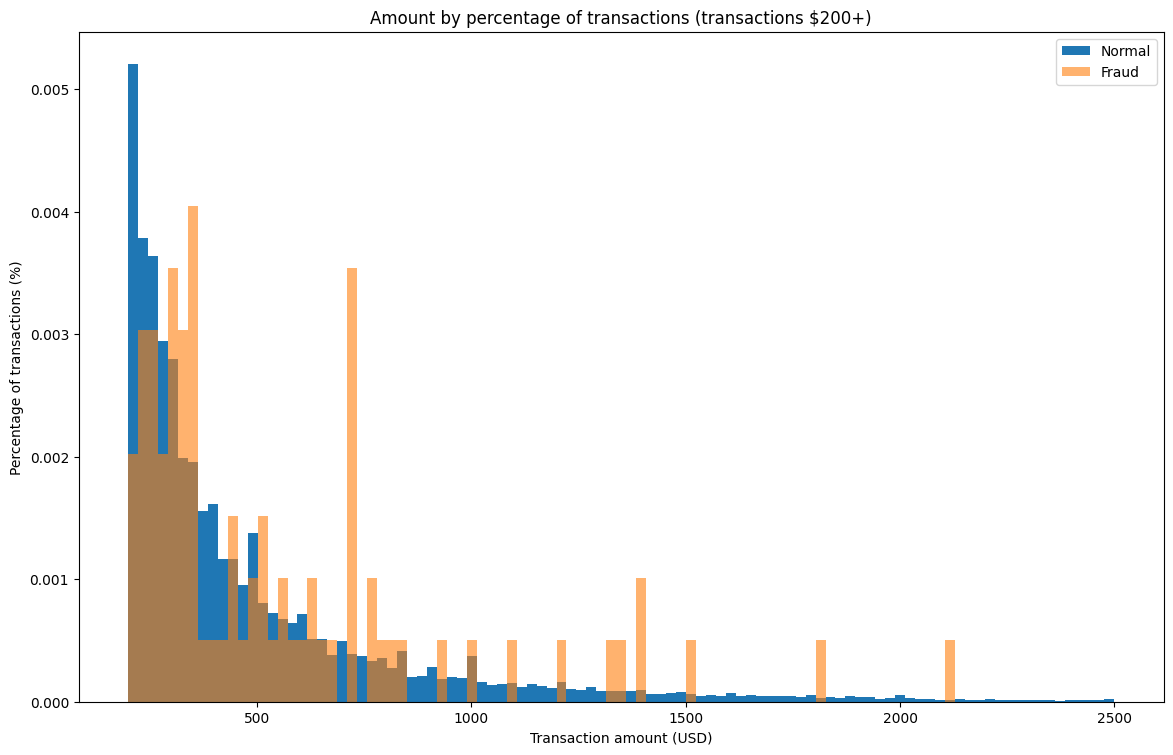

In [9]:
#plot of high value transactions
bins = np.linspace(200, 2500, 100)
#plt.hist(normal_df.Amount, bins, alpha=1, normed=True, label='Normal')
#plt.hist(fraud_df.Amount, bins, alpha=0.6, normed=True, label='Fraud')
plt.hist(normal_df.Amount, bins, alpha=1, density=True, label='Normal')
plt.hist(fraud_df.Amount, bins, alpha=0.6, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200+)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)");
plt.show()

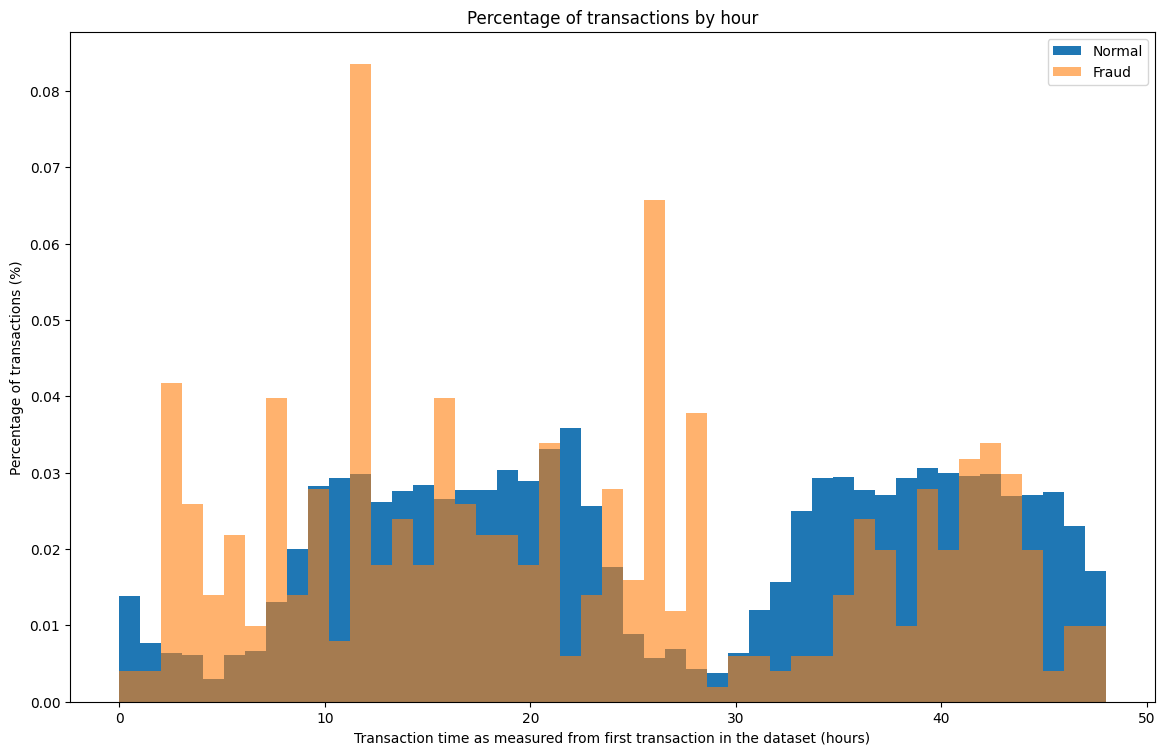

In [10]:
bins = np.linspace(0, 48, 48) #48 hours
#plt.hist((normal_df.Time/(60*60)), bins, alpha=1, normed=True, label='Normal')
#plt.hist((fraud_df.Time/(60*60)), bins, alpha=0.6, normed=True, label='Fraud')
plt.hist((normal_df.Time/(60*60)), bins, alpha=1, density=True, label='Normal')
plt.hist((fraud_df.Time/(60*60)), bins, alpha=0.6, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time as measured from first transaction in the dataset (hours)")
plt.ylabel("Percentage of transactions (%)");
#plt.hist((df.Time/(60*60)),bins)
plt.show()

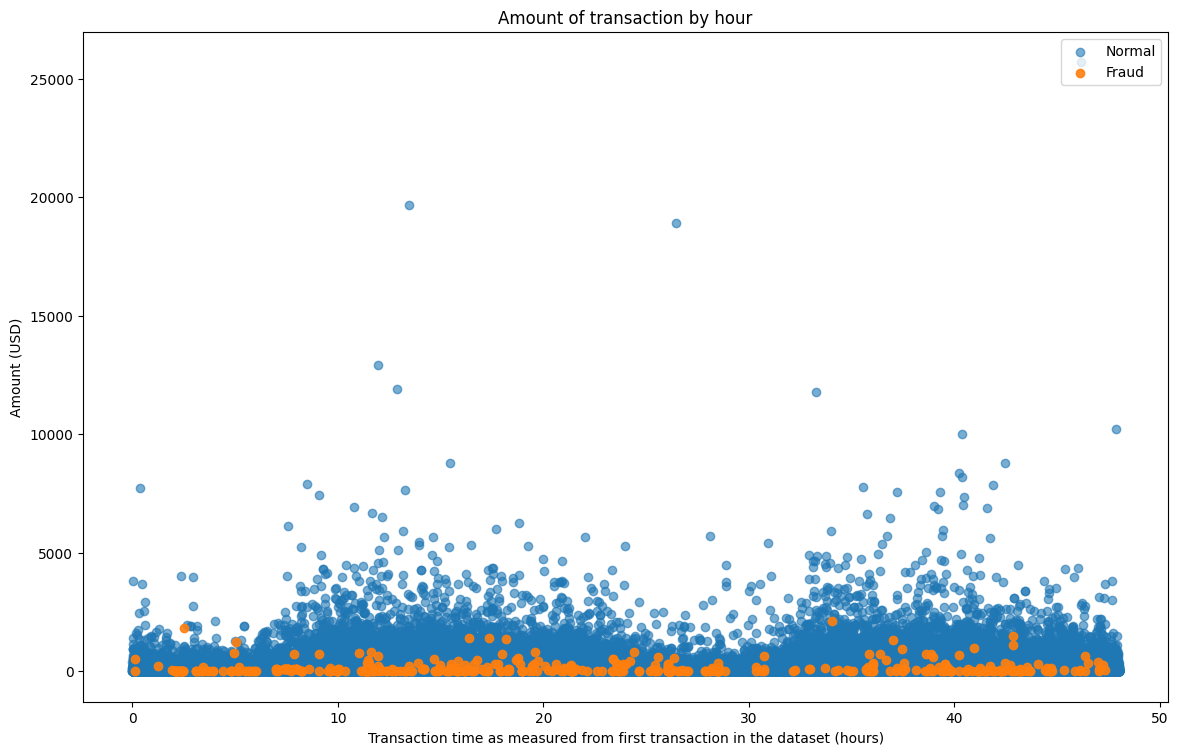

In [11]:
plt.scatter((normal_df.Time/(60*60)), normal_df.Amount, alpha=0.6, label='Normal')
plt.scatter((fraud_df.Time/(60*60)), fraud_df.Amount, alpha=0.9, label='Fraud')
plt.title("Amount of transaction by hour")
plt.xlabel("Transaction time as measured from first transaction in the dataset (hours)")
plt.ylabel('Amount (USD)')
plt.legend(loc='upper right')
plt.show()

In [45]:
y = df['Class']
X = df.drop('Class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

Text(0.5, 1.0, 'Number of observations per class')

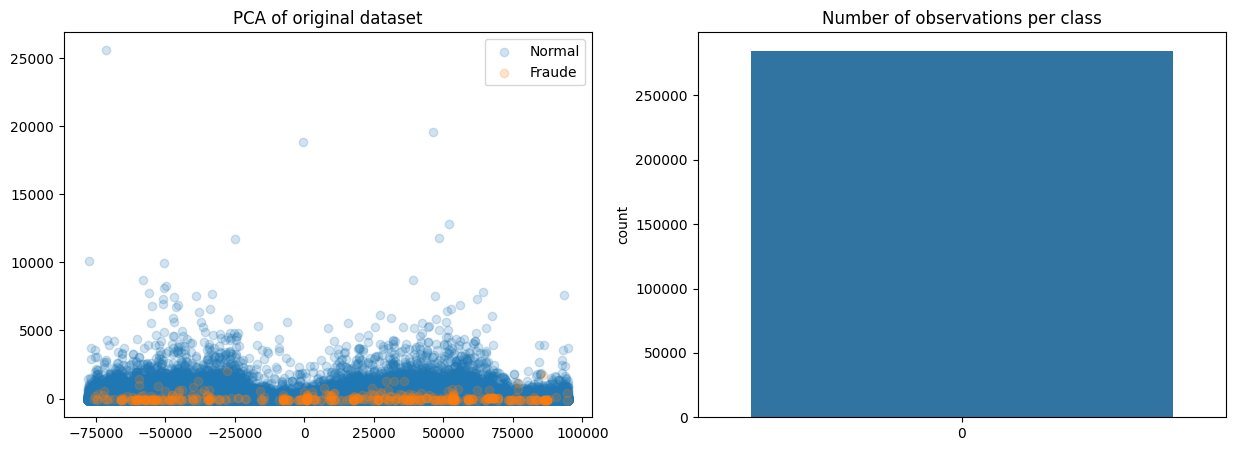

In [46]:
# Reduce dataset to 2 feature dimensions in order to visualize the data
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)

fig, ax = plt.subplots(1, 2, figsize= (15,5))

ax[0].scatter(X_reduced[y == 0, 0], X_reduced[y == 0, 1], label="Normal", alpha=0.2)
ax[0].scatter(X_reduced[y == 1, 0], X_reduced[y == 1, 1], label="Fraude", alpha=0.2)
ax[0].set_title('PCA of original dataset')
ax[0].legend()

ax[1] = sns.countplot(y)
ax[1].set_title('Number of observations per class')

In [47]:
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base

# Modelo sin balancear

In [48]:
model = run_model(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [49]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

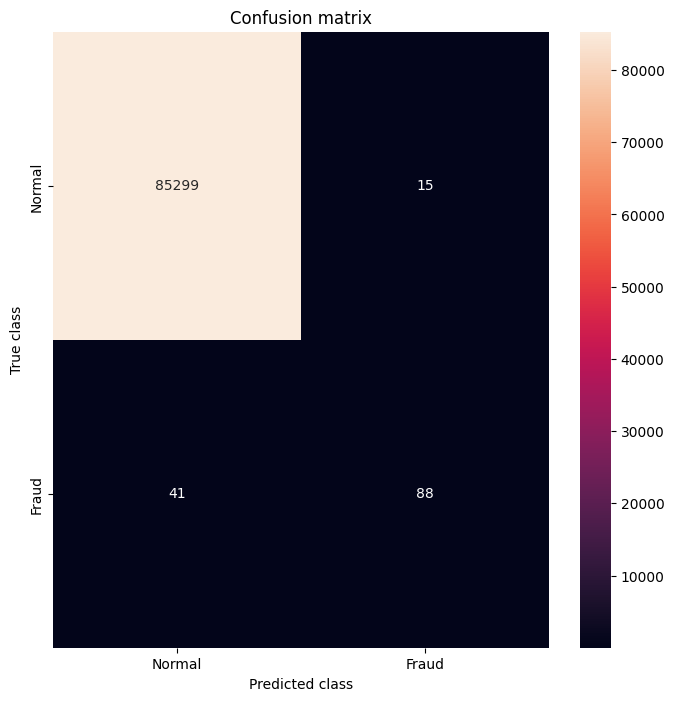

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85314
           1       0.85      0.68      0.76       129

    accuracy                           1.00     85443
   macro avg       0.93      0.84      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [50]:
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

Aqui vemos la confusion matrix y en la clase 2 (es lo que nos interesa detectar) vemos 41 fallos y 88 aciertos dando un recall de 0.68 y es el valor que queremos mejorar. También es interesante notar que en la columna de f1-score obtenemos muy buenos resultados PERO que realmente no nos deben engañar… pues están reflejando una realidad parcial. Lo cierto es que nuestro modelo no es capaz de detectar correctamente los casos de Fraude

# 1 Estrategia: Penalización

Utilizaremos un parámetro adicional en el modelo de Regresión logística en donde indicamos weight = “balanced” y con esto el algoritmo se encargará de equilibrar a la clase minoritaria durante el entrenamiento. Veamos:

In [52]:
def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    clf.fit(X_train, y_train)
    return clf

model = run_model_balanced(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


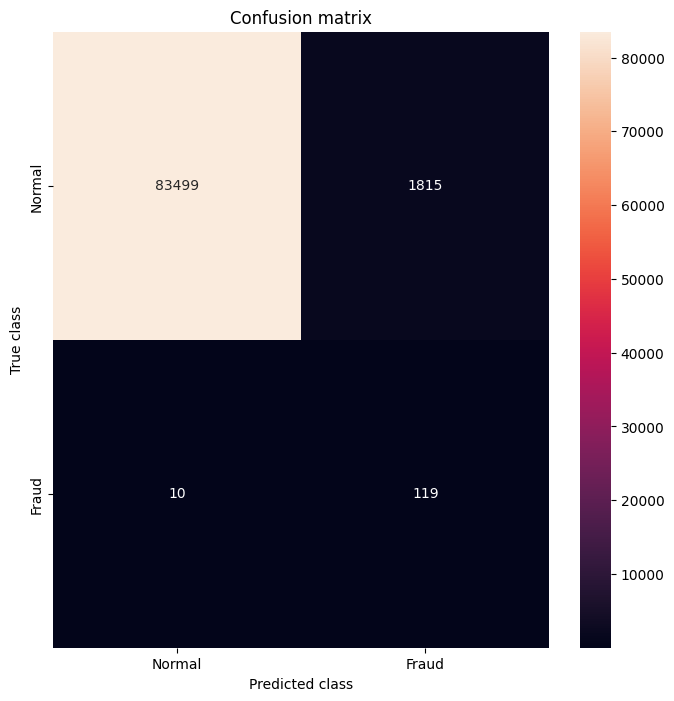

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85314
           1       0.06      0.92      0.12       129

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [53]:
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

Ahora vemos una NOTABLE MEJORA! en la clase 2 -que indica si hubo fraude-, se han acertado 119 muestras y fallado en 10, dando un recall de 0.92 !! y sólo con agregar un parámetro al modelo. También notemos que en la columna de f1-score parecería que hubieran “empeorado” los resultados… cuando realmente estamos mejorando la detección de casos fraudulentos. Es cierto que aumentan los Falsos Positivos y se han etiquetado 1714 muestras como Fraudulentas cuando no lo eran… pero ustedes piensen… ¿qué prefiere la compañía bancaria? ¿tener que revisar esos casos manualmente ó fallar en detectar los verdaderos casos de fraude?

# 2 NearMiss subsampling del grupo mayoritario

Lo que haremos es utilizar un algoritmo para reducir la clase mayoritaria. Lo haremos usando un algoritmo que hace similar al k-nearest neighbor para ir seleccionando cuales eliminar. Fijemonos que reducimos bestialmente de 199.020 muestras de clase cero (la mayoría) y pasan a ser 688. y Con esas muestras entrenamos el modelo.

In [54]:
#us = NearMiss(sampling_strategy=0.5, n_neighbors=3, version=2, random_state=1)
us = NearMiss(sampling_strategy=0.5, n_neighbors=3, version=2)
# replace ratio for sampling_strategy=0.6
X_train_res, y_train_res = us.fit_resample(X_train, y_train)

print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(Counter(y_train_res)))

Distribution of class labels before resampling Counter({0: 199001, 1: 363})
Distribution of class labels after resampling Counter({0: 726, 1: 363})


In [55]:
model = run_model(X_train_res, X_test, y_train_res, y_test)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


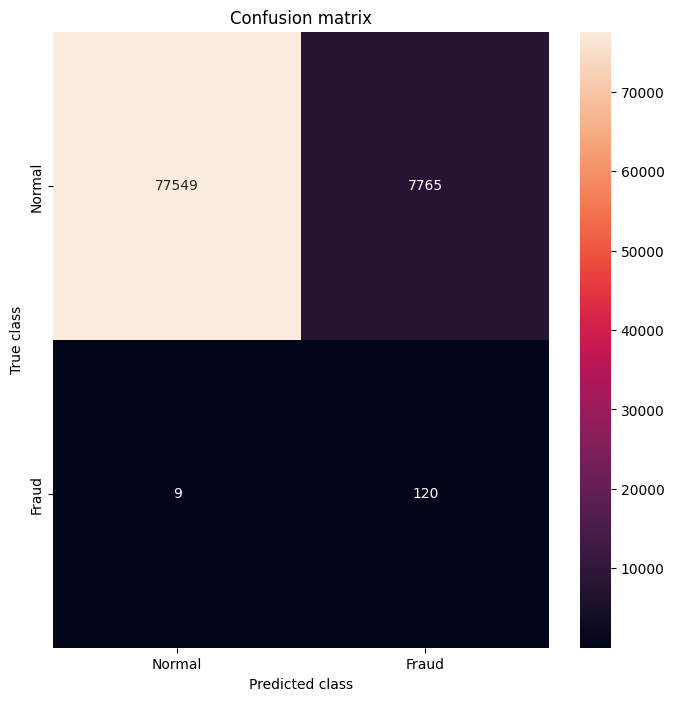

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     85314
           1       0.02      0.93      0.03       129

    accuracy                           0.91     85443
   macro avg       0.51      0.92      0.49     85443
weighted avg       1.00      0.91      0.95     85443



In [56]:
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

También vemos que obtenemos muy buen resultado con recall de 0.93 aunque a costa de que aumentaran los falsos positivos.

# 3 Random Oversampling

En este caso, crearemos muestras nuevas “sintéticas” de la clase minoritaria. Usando RandomOverSampler. Y vemos que pasamos de 344 muestras de fraudes a 99.510.

In [57]:
os =  RandomOverSampler(sampling_strategy=0.5)
X_train_res, y_train_res = os.fit_resample(X_train, y_train)

print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(Counter(y_train_res)))

Distribution of class labels before resampling Counter({0: 199001, 1: 363})
Distribution of class labels after resampling Counter({0: 199001, 1: 99500})


In [58]:
model = run_model(X_train_res, X_test, y_train_res, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


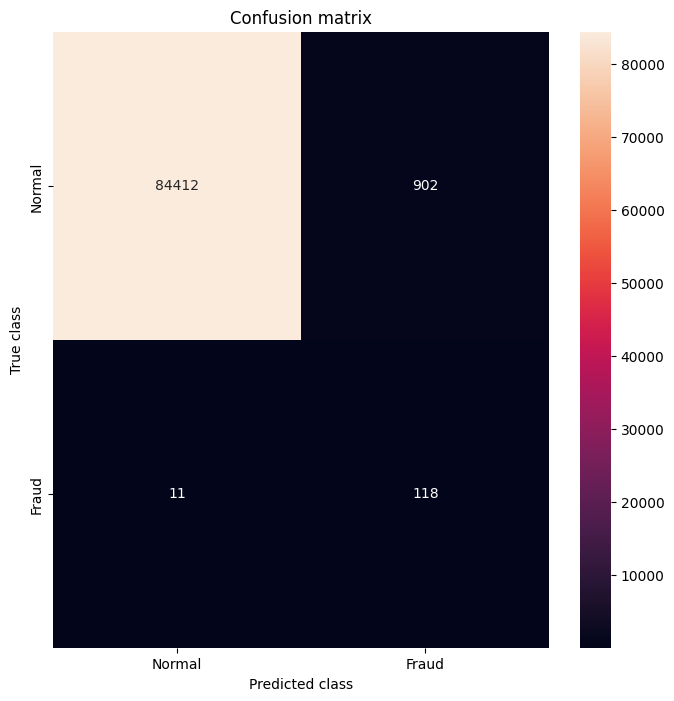

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85314
           1       0.12      0.91      0.21       129

    accuracy                           0.99     85443
   macro avg       0.56      0.95      0.60     85443
weighted avg       1.00      0.99      0.99     85443



In [59]:
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

Tenemos un 0.89 de recall para la clase 2 y los Falsos positivos son 883. Nada mal.



# 4 Combinando Smote tomek

Ahora probaremos una técnica muy usada que consiste en aplicar en simultáneo un algoritmo de subsampling y otro de oversampling a la vez al dataset. En este caso usaremos SMOTE para oversampling: busca puntos vecinos cercanos y agrega puntos “en linea recta” entre ellos. Y usaremos Tomek para undersampling que quita los de distinta clase que sean nearest neighbor y deja ver mejor el decisión boundary (la zona limítrofe de nuestras clases).

In [60]:
os_us = SMOTETomek(sampling_strategy=0.5)
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)

print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(Counter(y_train_res)))

Distribution of class labels before resampling Counter({0: 199001, 1: 363})
Distribution of class labels after resampling Counter({0: 198089, 1: 98588})


In [ ]:
model = run_model(X_train_res, X_test, y_train_res, y_test)

/Users/jbagnato/anaconda3/envs/python36/lib/python3.6/site-packages/scipy/optimize/linesearch.py:461: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/jbagnato/anaconda3/envs/python36/lib/python3.6/site-packages/scipy/optimize/linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/jbagnato/anaconda3/envs/python36/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


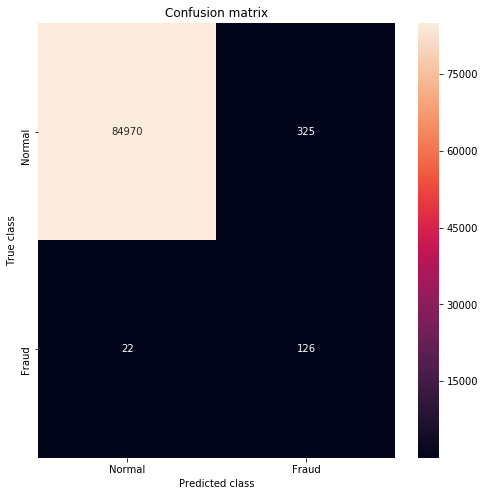

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.28      0.85      0.42       148

    accuracy                           1.00     85443
   macro avg       0.64      0.92      0.71     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

En este caso seguimos teniendo bastante buen recall 0.85 de la clase 2 y vemos que los Falsos positivos de la clase 1 son bastante pocos, 325 (de 85295 muestras).

# 5 Ensemble balanceado

Para esta estrategia usaremos un Clasificador de Ensamble que utiliza Bagging y el modelo será un DecisionTree. Veamos como se comporta:

In [ ]:
#Create an object of the classifier.
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

#Train the classifier.
bbc.fit(X_train, y_train)

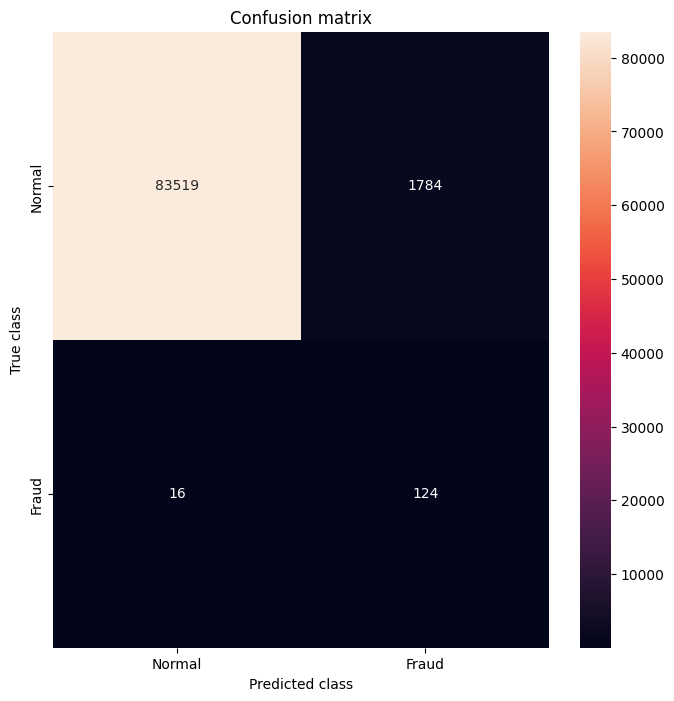

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85303
           1       0.06      0.89      0.12       140

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443



In [24]:
pred_y = bbc.predict(X_test)
mostrar_resultados(y_test, pred_y)

Tampoco está mal. Vemos siempre mejora con respecto al modelo inicial con un recall de 0.88 para los casos de fraude.

# Resultados

In [ ]:
df = pd.DataFrame({'algorithm' : ['Regresion Logística', 'Penalizacion', 'NearMiss Subsampling',
                                  'Random Oversampling', 'Smote Tomek', 'Ensemble'],
                   'precision' : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
                   'recall' : [0.66, 0.93, 0.93, 0.89, 0.85, 0.88]})

df['overall'] = df.apply(lambda row: (row.precision + row.recall)/2, axis=1)

df = df.sort_values(['overall'], ascending=False)
df

,algorithm,precision,recall,overall
1,Penalizacion,1.0,0.93,0.965
2,NearMiss Subsampling,1.0,0.93,0.965
3,Random Oversampling,1.0,0.89,0.945
5,Ensemble,1.0,0.88,0.940
4,Smote Tomek,1.0,0.85,0.925
0,Regresion Logística,1.0,0.66,0.830
